Ejemplo 1
=======

Ejemplo que muestra con una instancia simple la correctitud del modelo.

In [1]:
import contextlib
import functools
import matplotlib.pyplot as plt
import os

import networkx as nx

import bcnetwork as bc

## Especificacion de los datos

La instancia esta compuesta por un grafo y dos pares origen destino. Lo que se quiere demostrar es cómo construiyendo infrastructuras en arcos donde no pasan, a prior, los caminos más cortos, se llega a la solución óptima.

In [2]:
nodes = [
    # node, x, y
    ('1', 0, 4),
    ('2', 0, 0),
    ('3', 2, 2),
    ('4', 4, 2),
    ('5', 6, 4),
    ('6', 6, 0),
]
arcs = [
    # from, to, weight
    ('1', '3', 2),
    ('1', '5', 6),
    ('2', '3', 2),
    ('2', '6', 6),
    ('3', '4', 3),
    ('4', '5', 2),
    ('4', '6', 2),
]

graph = nx.DiGraph()

for n, x, y in nodes:
    graph.add_node(n, pos=(x, y))

for n1, n2, weight in arcs:
    # Set user_cost and construction_cost for infrastructure 1,
    # Values for base infrastructre are set automatically
    graph.add_edge(
        n1, n2,
        user_cost=weight,
        construction_cost=weight,
        user_cost_1=weight / 2,
    )

odpairs = [
    # origin, destination, demand
    ('1', '5', 3),
    ('2', '6', 3)
]

breakpoints = [
    # P, Q
    (0, 1), # There's 0 transfer if user cost is no lesser than 1 * best_base_path_cost
    (1, 0.667),
]

budget = 11
# Two infrastructures:
# base and the next level of improvement
infrastructure_count = 2

In [3]:
# Creates the model object
model = bc.model.Model(
    name='Ejemplo 1',
    graph=graph,
    infrastructure_count=infrastructure_count,
    budget=budget,
    odpairs=odpairs,
    breakpoints=breakpoints,
)
solution = model.solve(solver='glpsol')

## Flujos

In [4]:
fig_dir = '../thesis/resources'

get_fig_dir = functools.partial(os.path.join, fig_dir)

figsize = (5, 3)
draw = functools.partial(
    bc.draw.draw, model, figsize=figsize, odpair_scale_factor=3, odpair_separate=True,
    odpairs_legend=False)
draw_sol = functools.partial(draw, solution=solution)


@contextlib.contextmanager
def save_fig(file_name, dpi=None, **fig_kw):
    fig, ax = plt.subplots(**fig_kw)
    yield ax
    fig.savefig(file_name, dpi=dpi)

/home/joaquin/.pyenv/versions/3.9.6/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


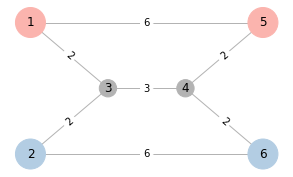

In [5]:
with save_fig(get_fig_dir('example_1_base.png'), figsize=figsize) as ax:
    draw(with_labels=True, edge_weight_label='user_cost', ax=ax, margins=(0.1, 0.12))

## Infrastructuras

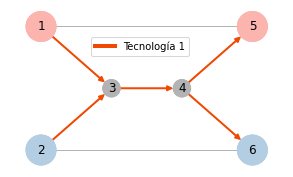

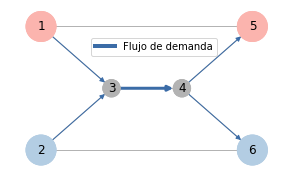

In [6]:
with save_fig(get_fig_dir('example_1_infras.png'), ) as ax:
    draw_sol(flows=False, infrastructures=True, ax=ax, legend_location=(0.3, .70), margins=(0.1, 0.1))
with save_fig(get_fig_dir('example_1_flows.png')) as ax:
    draw_sol(flows=True, infrastructures=False, ax=ax, legend_location=(0.3, .70), margins=(0.1, 0.1))

In [7]:
solution.data

{'shortest_paths': [{'origin': '1',
   'destination': '5',
   'shortest_path_cost': 3.5},
  {'origin': '2', 'destination': '6', 'shortest_path_cost': 3.5}],
 'flows': [{'origin': '1',
   'destination': '5',
   'arc': 'arc_1_3',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '1',
   'destination': '5',
   'arc': 'arc_3_4',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '1',
   'destination': '5',
   'arc': 'arc_4_5',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '2',
   'destination': '6',
   'arc': 'arc_2_3',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '2',
   'destination': '6',
   'arc': 'arc_3_4',
   'infrastructure': 1,
   'flow': 1},
  {'origin': '2',
   'destination': '6',
   'arc': 'arc_4_6',
   'infrastructure': 1,
   'flow': 1}],
 'infrastructures': [{'arc': 'arc_1_3',
   'infrastructure': '1',
   'construction_cost': 2.0},
  {'arc': 'arc_2_3', 'infrastructure': '1', 'construction_cost': 2.0},
  {'arc': 'arc_3_4', 'infrastructure': '1', 'construction_co